This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
Data Description:
Invoice No: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
Stock Code: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
Invoice Date: Invoice Date and time. Numeric, the day and time when each
transaction was generated.
Unit Price: Unit price. Numeric, Product price per unit in sterling.
Customer ID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal, the name of the country where each customer resides.
Problem statement
It is a business critical requirement to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Tutorial on Statistical Analysis and Modelling with Python Week 11
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).
Identifying the most valuable RFM segments can capitalize on chance relationships in the data used for this analysis.

Approach: Following pointers will be helpful to structure your findings. Perform a preliminary data inspection and Data cleaning
a) Check for missing data and formulate apt strategy to treat them. 
b) Are there any duplicate data records? Remove them if present. 
c) Perform Descriptive analytics on the given data.

**Customers may be reached out to in the most effective way possible with the use of customer segmentation, which can be used by both corporate and individual marketers. A customer segmentation research makes use of the vast amount of data on customers (and potential customers) to accurately identify different consumer groups based on demographic, behavioural, and other variables.**

**By targeting particular consumer groups with communications that are far more relevant to their unique behaviours through RFM segmentation, marketers may increase response rates, improve loyalty, and increase customer lifetime value. RFM segmentation, like other segmentation techniques, is a useful tool for identifying customer categories that require distinct treatment. Recency, frequency, and money are abbreviated as RFM.**

*Online Retail.xlsx dataset has been used for RFM analysis.*

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
from scipy import stats
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
customer_data = pd.read_excel("OnlineRetail.xlsx") 

In [3]:
customer_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
missing_values_count = customer_data.isnull().sum()

print(missing_values_count[missing_values_count > 0])

Description      1454
CustomerID     135080
dtype: int64


In [6]:
print('{:,} Rows; {:,} Columns'
      .format(customer_data.shape[0], customer_data.shape[1]))
print('{:,} Transactions don\'t have a customer id'
      .format(customer_data[customer_data.CustomerID.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(customer_data['InvoiceDate'].min(),
                                    customer_data['InvoiceDate'].max()))

541,909 rows; 8 columns
135,080 transactions don't have a customer id
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [7]:
# Drop NA values from online
customer_data.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [21]:
# checking duplicate values in the dataset.
customer_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalSum            0
dtype: int64

In [22]:
# -- Droping the duplicate values in the dataset column Description and Customer ID
customer_data['Description'].fillna(value='Missing Value', inplace=True)
customer_data['Description'].value_counts(dropna=False)

customer_data['CustomerID'].fillna(value='Missing Value', inplace=True)
customer_data['CustomerID'].value_counts(dropna=False)

Missing Value    135080
17841.0            7983
14911.0            5903
14096.0            5128
12748.0            4642
                  ...  
13270.0               1
17763.0               1
17291.0               1
15668.0               1
15562.0               1
Name: CustomerID, Length: 4373, dtype: int64

In [23]:
# checking if the duplicate values are gone.
customer_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSum       0
dtype: int64

In [24]:
# --Group customer data by customerID--
# Create TotalSum column for online dataset
customer_data['TotalSum'] = customer_data['Quantity'] * customer_data['UnitPrice']

In [25]:
snapshot_date = customer_data['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


In [26]:
# Grouping by CustomerID
customer_data_preprocess = customer_data.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

In [27]:
# Rename the columns for easy preprocessing.
customer_data_preprocess.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [28]:
# Print top 5 rows and shape of dataframe
print(customer_data_preprocess.head())
print('{:,} rows; {:,} columns'
      .format(customer_data_preprocess.shape[0], customer_data_preprocess.shape[1]))

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          2           0.00
12347.0           2        182        4310.00
12348.0          75         31        1797.24
12349.0          19         73        1757.55
12350.0         310         17         334.40
4,373 rows; 3 columns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

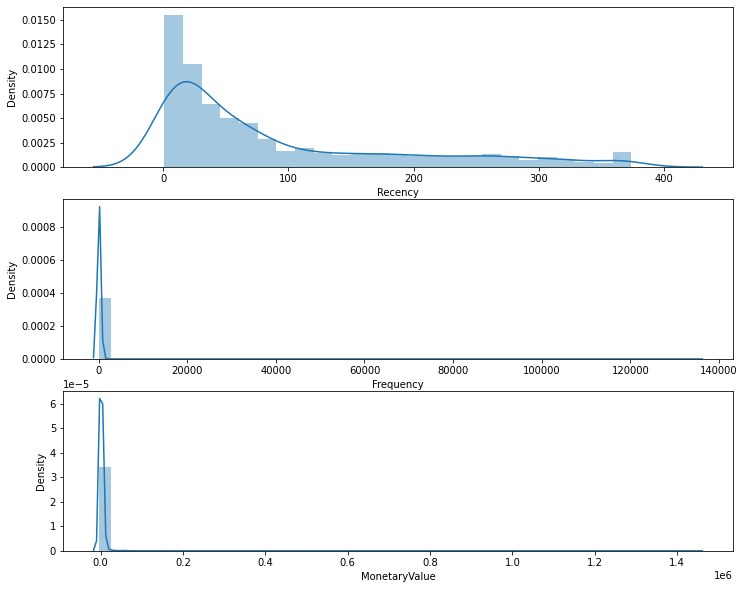

In [29]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(customer_data_preprocess['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(customer_data_preprocess['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(customer_data_preprocess['MonetaryValue'])
# Show the plot
plt.show()

In [30]:
#Calculating R and F groups
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(customer_data_preprocess['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(customer_data_preprocess['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
customer_data_preprocess = customer_data_preprocess.assign(R = r_groups.values, F = f_groups.values)
customer_data_preprocess.head()

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12346.0,326,2,0.00,1,1
12347.0,2,182,4310.00,4,4
12348.0,75,31,1797.24,2,2
12349.0,19,73,1757.55,3,3
12350.0,310,17,334.40,1,1


In [31]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(customer_data_preprocess['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
customer_data_preprocess = customer_data_preprocess.assign(M = m_groups.values)
customer_data_preprocess.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [32]:
# Concating the RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
customer_data_preprocess['RFM_Segment_Concat'] = customer_data_preprocess.apply(join_rfm, axis=1)
customer_data_preprocess_rfm = customer_data_preprocess
customer_data_preprocess_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0
12347.0,2,182,4310.00,4,4,4,4.04.04.0
12348.0,75,31,1797.24,2,2,4,2.02.04.0
12349.0,19,73,1757.55,3,3,4,3.03.04.0
12350.0,310,17,334.40,1,1,2,1.01.02.0


In [33]:
# Count num of unique segments
customer_data_preprocess_rfm_count_unique = customer_data_preprocess_rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(customer_data_preprocess_rfm_count_unique.sum())

62


In [34]:
# Calculate RFM_Score
customer_data_preprocess_rfm['RFM_Score'] = customer_data_preprocess_rfm[['R','F','M']].sum(axis=1)
print(customer_data_preprocess_rfm['RFM_Score'].head())

CustomerID
12346.0     3
12347.0    12
12348.0     8
12349.0    10
12350.0     4
Name: RFM_Score, dtype: int64


In [35]:
# Define FMCG_rfm_level function
def customer_data_preprocess_rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal/Commited'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Requires Attention'
    else:
        return 'Demands Activation'
# Create a new variable RFM_Level
customer_data_preprocess_rfm['RFM_Level'] = customer_data_preprocess_rfm.apply(customer_data_preprocess_rfm_level, axis=1)
# Printing the header with top 15 rows 
customer_data_preprocess_rfm.head(15)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Demands Activation
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Can't Loose Them
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Champions
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Can't Loose Them
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Requires Attention
12352.0,36,95,1545.41,3,3,3,3.03.03.0,9,Can't Loose Them
12353.0,204,4,89.00,1,1,1,1.01.01.0,3,Demands Activation
12354.0,232,58,1079.40,1,3,3,1.03.03.0,7,Loyal/Commited
12355.0,214,13,459.40,1,1,2,1.01.02.0,4,Requires Attention


In [38]:
# Calculate average values for each RFM_Level, and return a size of each segment 
customer_data_preprocess_rfm_level_agg = customer_data_preprocess_rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(f'Conclusion : \n{customer_data_preprocess_rfm_level_agg}')

Conclusion : 
                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      25.2     275.0        4986.0  1690
Champions             62.8      57.1         976.8   467
Demands Activation   264.8       7.8         109.1   392
Loyal/Commited        78.8      39.7         724.0   448
Potential             94.3      28.5         491.8   468
Promising            153.1      21.2         346.9   516
Requires Attention   174.4      13.9         227.3   392


References:


1.  https://github.com/sharmaroshan/Online-Retail-Transactions-of-UK/blob/master/Online_Retail.ipynb
2.  https://towardsdatascience.com/an-rfm-customer-segmentation-with-python-cf7be647733d
3.  https://medium.com/@ogunbajoadeyinka/building-an-rfm-model-in-python-3481112a2816
4. https://github.com/sharmaroshan/Online-Retail-Transactions-of-UK/blob/master/Online_Retail.ipynb
5. https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp

